In [1]:
import sys
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils, Definitions
from hostelprices.database import Database
from hostelprices.analysis import HostelDF

%load_ext autoreload
%autoreload 2

In [2]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
collection_name = "main_coll-dev-12_21_2022-13_42"

DB = Database(
    client_id=client_id, data_base_name=data_base_name, collection_name=collection_name
    )

In [3]:
df_all = DB.getPandasDf()
df_all

,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time
0,63a310561e3c536865caa934,33.965468,9.7,0.5,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378
1,63a310561e3c536865caa935,29.248042,9.7,0.4,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378
2,63a310561e3c536865caa936,24.530616,9.3,1.3,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378
3,63a310561e3c536865caa937,6.550000,9.2,0.5,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378
4,63a310561e3c536865caa938,17.926219,9.3,0.8,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378
...,...,...,...,...,...,...,...,...
219,63a310561e3c536865caaa0f,16.039249,8.8,1.4,Seville,2023-01-17,5,2022-12-21 13:55:24.353
220,63a310561e3c536865caaa10,14.152279,7.8,1.0,Seville,2023-01-17,5,2022-12-21 13:55:24.353
221,63a310561e3c536865caaa11,16.982734,8.9,1.1,Seville,2023-01-17,5,2022-12-21 13:55:24.353
222,63a310561e3c536865caaa12,27.361072,9.1,1.1,Seville,2023-01-17,5,2022-12-21 13:55:24.353


In [70]:
hdf = HostelDF(df_all)
print(len(hdf))
hdf = hdf.filter(min_rating=9.5)
print(len(hdf))
hdf

224
25


,_id,price (EUR),rating,distance (km),city,date_from,duration (days),request_time,rating_per_price
0,63a310561e3c536865caa934,33.965468,9.7,0.5,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378,0.285584
1,63a310561e3c536865caa935,29.248042,9.7,0.4,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378,0.331646
26,63a310561e3c536865caa94e,54.722144,10.0,0.2,Lisbon,2023-01-13,1,2022-12-21 13:45:32.378,0.182741
32,63a310561e3c536865caa954,21.700160,10.0,8.0,Lisbon,2023-01-13,1,2022-12-21 13:45:47.444,0.460826
34,63a310561e3c536865caa956,3.980000,9.7,0.5,Lisbon,2023-01-13,5,2022-12-21 13:46:27.060,2.437186
35,63a310561e3c536865caa957,26.417587,9.7,0.4,Lisbon,2023-01-13,5,2022-12-21 13:46:27.060,0.367180
38,63a310561e3c536865caa95a,0.410000,9.7,0.3,Lisbon,2023-01-13,5,2022-12-21 13:46:27.060,23.658537
69,63a310561e3c536865caa979,29.248042,9.7,0.5,Lisbon,2023-01-17,1,2022-12-21 13:49:30.023,0.331646
70,63a310561e3c536865caa97a,24.530616,9.7,0.4,Lisbon,2023-01-17,1,2022-12-21 13:49:30.023,0.395424
73,63a310561e3c536865caa97d,27.361072,9.7,0.3,Lisbon,2023-01-17,1,2022-12-21 13:49:30.023,0.354518


In [4]:
print(df_all.city.value_counts())
print(df_all.date_from.value_counts())
print(df_all["duration (days)"].value_counts())

Lisbon     144
Seville     80
Name: city, dtype: int64
2023-01-17    115
2023-01-13    109
Name: date_from, dtype: int64
5    115
1    109
Name: duration (days), dtype: int64


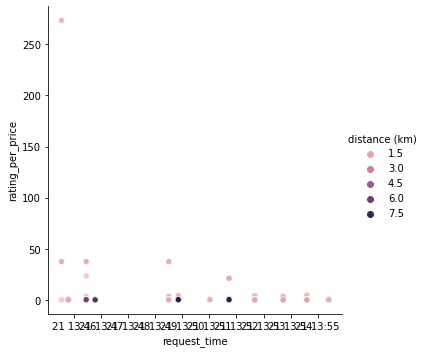

In [7]:
sns.relplot(
    data=df_all,    
    x='request_time',
    y='rating_per_price',
    hue='distance (km)'
    )
plt.show()